In [1]:
import math
import os
import re
import altair as alt
import numpy as np
import pandas as pd
import scipy.stats
import yaml
import neutcurve
import scipy.stats
print(f"Using `neutcurve` version {neutcurve.__version__}")
import sys
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


# allow more rows for Altair
_ = alt.data_transformers.disable_max_rows()

#import altair themes from /data/custom_analyses_data/theme.py and enable
import theme
alt.themes.register('main_theme', theme.main_theme)
alt.themes.enable('main_theme')
plt.rcParams['svg.fonttype'] = 'none' #from bernadeta, for correct font svg output

from pathlib import Path
repo_root = Path.cwd().parent
os.chdir(repo_root)
print(os.getcwd())
#print(os.listdir("raw_plate_reader"))
plt.rcParams['svg.fonttype'] = 'none' #from bernadeta, for correct font svg output

Using `neutcurve` version 2.1.0
/fh/fast/bloom_j/computational_notebooks/tmcmahon/2024/02_RSV/RSV_evolution_neut


In [2]:
df = pd.read_csv('01_data/other/2024.09.26_LongVary_Nirsevimab_FractionInfectivity_SuppFig.csv')

In [5]:
fits = neutcurve.curvefits.CurveFits(
            data=df,
            fixbottom=0,
            #max_viruses_per_subplot=11
            )

#fitParams = fits.fitParams(ics=[10,50, 90, 95, 97, 98, 99])

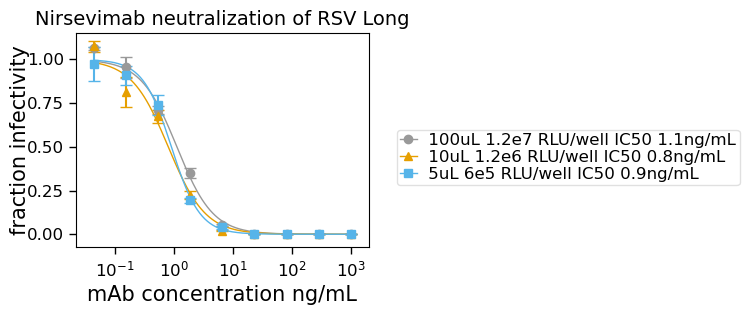

In [8]:
fig,axes = fits.plotSera(
            xlabel='mAb concentration ng/mL', 
            draw_in_bounds=True, ncol=3
)
fig.savefig('03_output/plots/240926_Neut_Long_Nirsev_VirusAmt_SuppFig.svg', bbox_inches='tight', dpi=100)
#fig.savefig('03_ouput/plots/240926_Neut_Long_Nirsev_VirusAmt_SuppFig.pdf', dpi=300, bbox_inches='tight')
#fig.savefig('03_ouput/plots/240926_Neut_Long_Nirsev_VirusAmt_SuppFig.svg', dpi=300, bbox_inches='tight')

<bound method CurveFits.plotReplicates of <neutcurve.curvefits.CurveFits object at 0x7fd14f493230>>

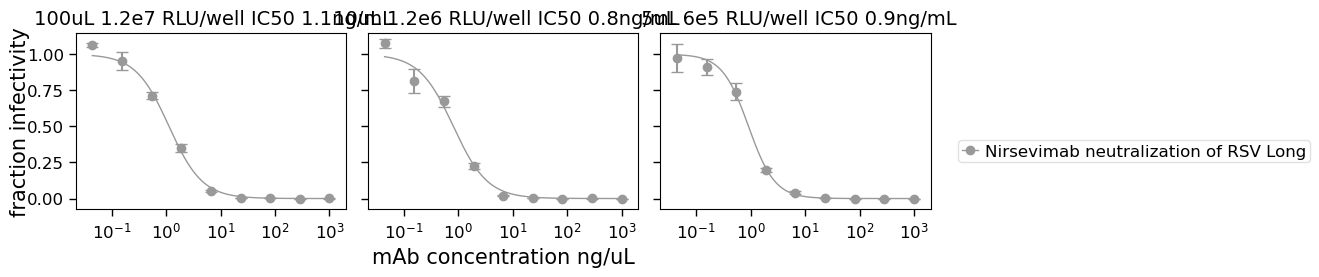

In [9]:
fig, axes = fits.plotViruses(
            xlabel='mAb concentration ng/uL', max_sera_per_subplot=8,
            draw_in_bounds=True, ncol=3
)
fits.plotReplicates
#fig.savefig('240926_Neut_Long_Nirsev_VirusAmt_lower_byvirus_SuppFig.pdf', dpi=100, bbox_inches='tight')

In [10]:
fits.fitParams()

,serum,virus,replicate,nreplicates,ic50,ic50_bound,ic50_str,midpoint,midpoint_bound,midpoint_bound_type,slope,top,bottom,r2,rmsd
0,Nirsevimab neutralization of RSV Long,100uL 1.2e7 RLU/well IC50 1.1ng/mL,average,2,1.134631,interpolated,1.13,1.134631,1.134631,interpolated,1.420924,1.0,0.0,0.995267,0.028856
1,Nirsevimab neutralization of RSV Long,10uL 1.2e6 RLU/well IC50 0.8ng/mL,average,2,0.810704,interpolated,0.811,0.810704,0.810704,interpolated,1.386733,1.0,0.0,0.986170,0.047141
2,Nirsevimab neutralization of RSV Long,5uL 6e5 RLU/well IC50 0.9ng/mL,average,2,0.915691,interpolated,0.916,0.915691,0.915691,interpolated,1.797974,1.0,0.0,0.997313,0.020865


In [12]:
#fits.fitParams().to_csv("03_ouput/processed_data/240926_Long_Nirsev_VirusAmtsIC50.csv")